In [2]:
import pandas as pd
import seaborn
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
# Read the file 'boston.csv'
data = pd.read_csv(r"C:\Users\谭兆宏\Desktop\boston.csv")

'''Step1: Process the incomplete data'''
column_list = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
             'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']
print(data.isnull().any())
# All return false, i.e. there is no incomplete data
for columns in column_list:
    a = data[columns].unique()
    list_of_type = []
    for i in a:
        list_of_type.append(type(i))
    list_of_type = list(set(list_of_type))
    print(list_of_type)
# Each column contains one type of data only, i.e. no invalid data

crim       False
zn         False
indus      False
chas       False
nox        False
rm         False
age        False
dis        False
rad        False
tax        False
ptratio    False
b          False
lstat      False
medv       False
dtype: bool
[<class 'numpy.float64'>]
[<class 'numpy.float64'>]
[<class 'numpy.float64'>]
[<class 'numpy.int64'>]
[<class 'numpy.float64'>]
[<class 'numpy.float64'>]
[<class 'numpy.float64'>]
[<class 'numpy.float64'>]
[<class 'numpy.int64'>]
[<class 'numpy.int64'>]
[<class 'numpy.float64'>]
[<class 'numpy.float64'>]
[<class 'numpy.float64'>]
[<class 'numpy.float64'>]


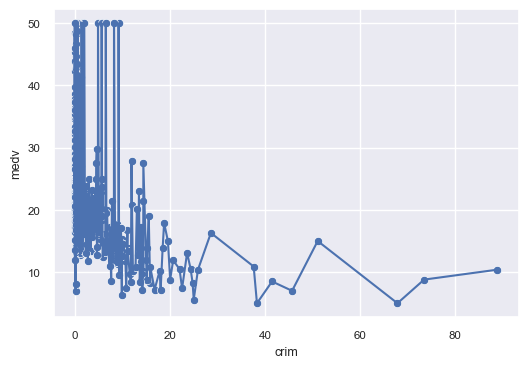

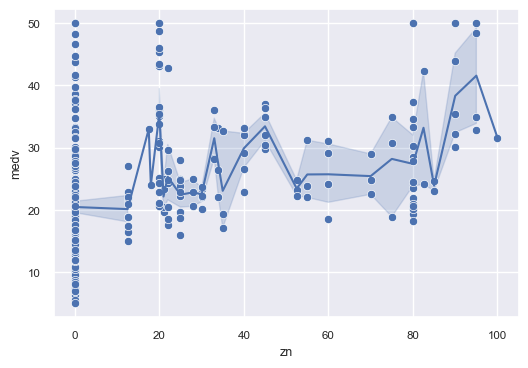

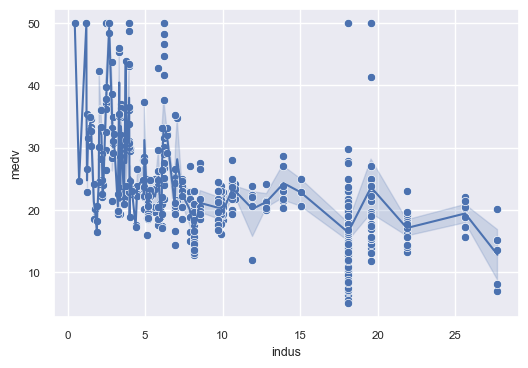

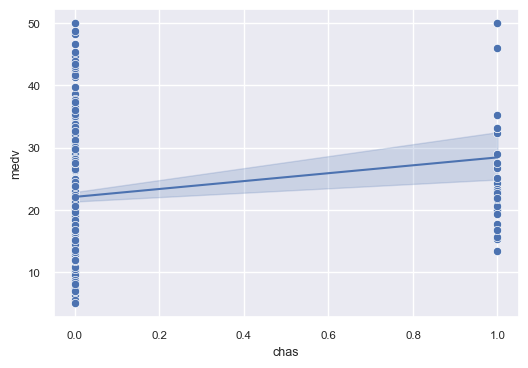

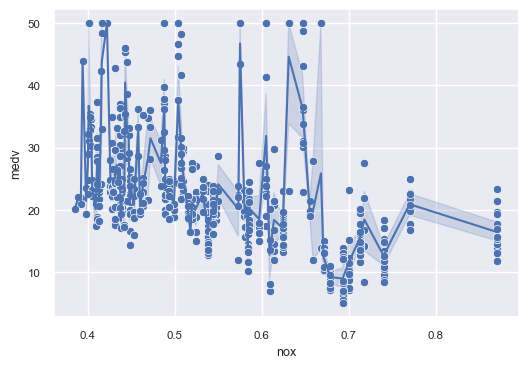

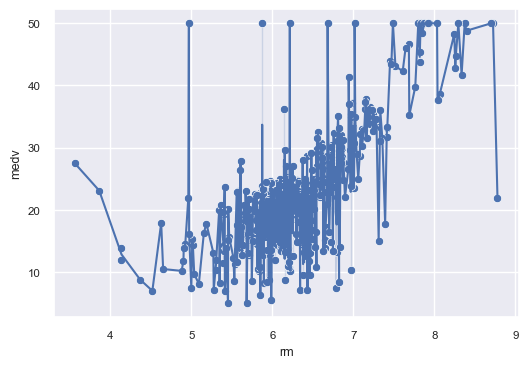

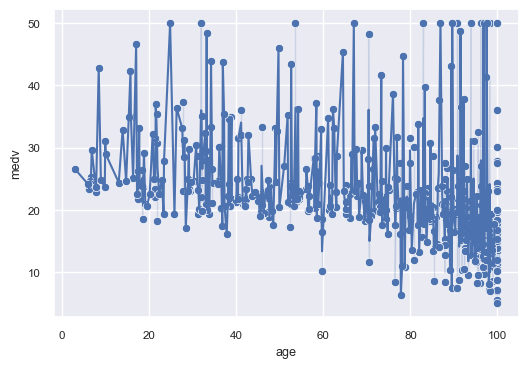

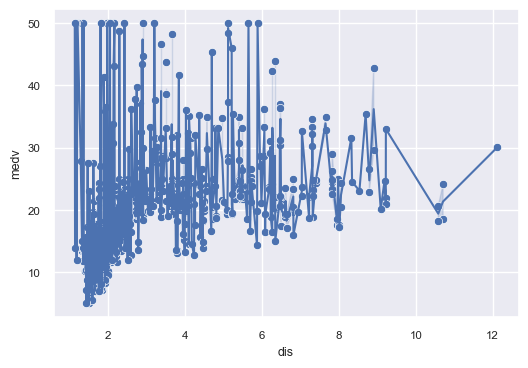

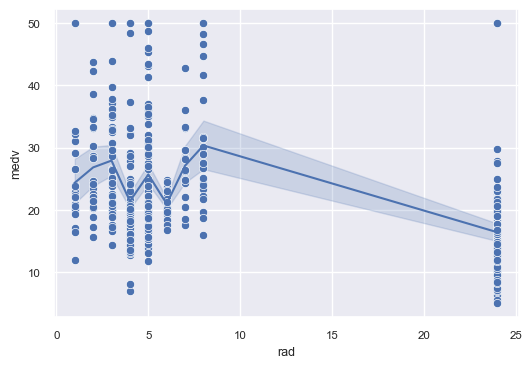

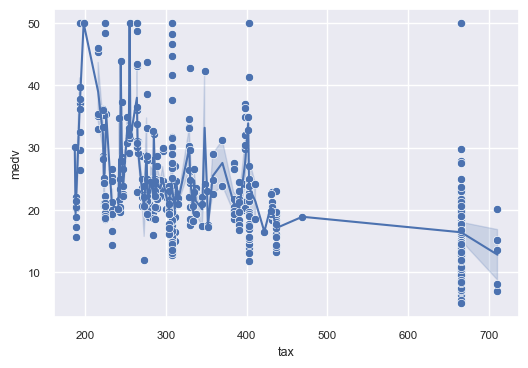

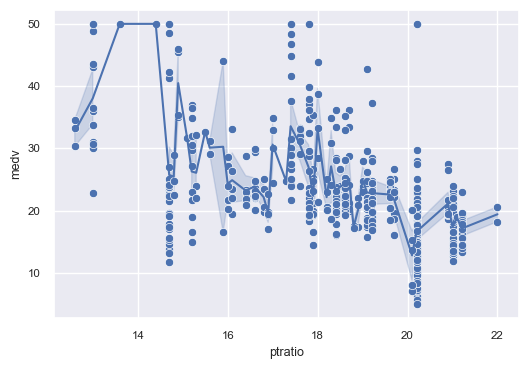

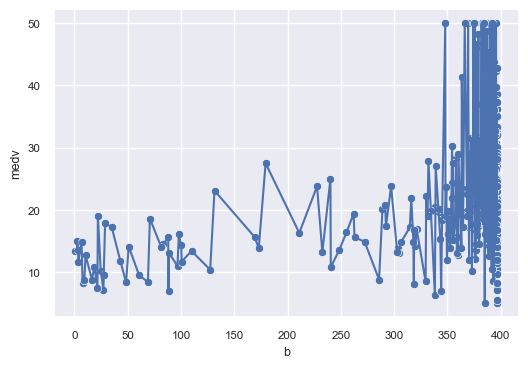

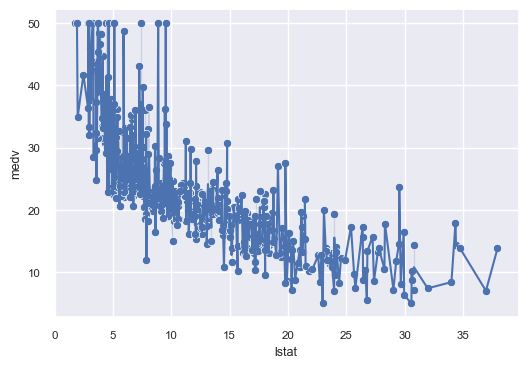

In [23]:
'''Step2: seaborn to visualize the dataset'''
data_to_plot = sns.load_dataset('boston', data_home=r'C:/Users/谭兆宏/seaborn-data', cache=True)
for column_head in ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis',
             'rad', 'tax', 'ptratio', 'b', 'lstat']:
    plt.figure(figsize=(6,4))
    sns.lineplot(x=column_head, y='medv', data=data_to_plot)
    sns.scatterplot(x=column_head, y='medv', data=data_to_plot)
    plt.show()

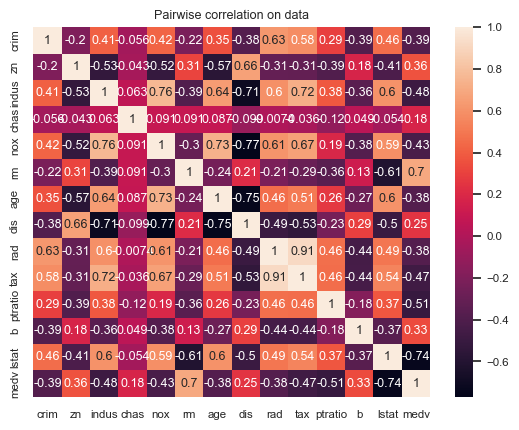

In [22]:
'''Step3: seaborn.heatmap to plot pairwise correlation on data'''
sns.set(font_scale=0.75)
sns.heatmap(data=data_to_plot.corr(), annot=True)
plt.title('Pairwise correlation on data')
plt.show()

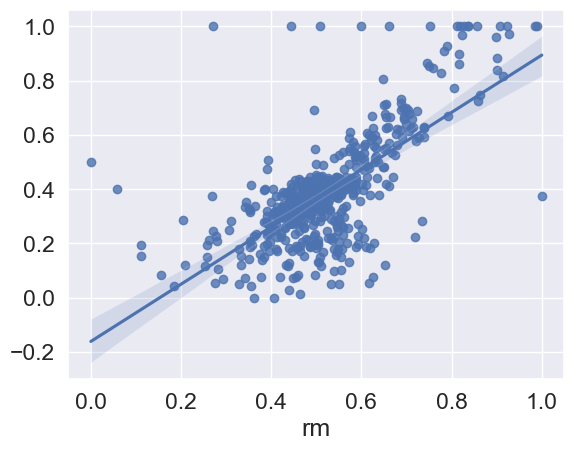

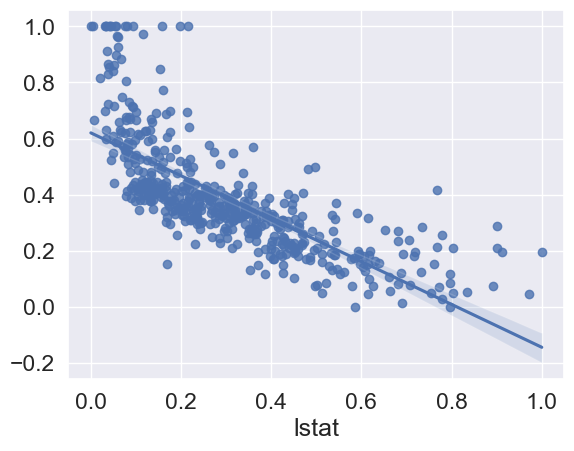

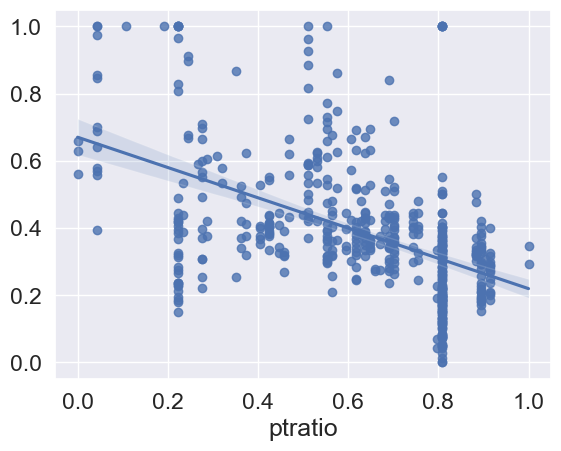

In [14]:
# '''Step4: sklearn.preprocessing.MinMaxScaler to scale the columns'''
scaler = MinMaxScaler()
data_column_0 = data_to_plot[["medv"]]
data_column_0_new = scaler.fit_transform(data_column_0)
data_column_1 = data_to_plot[["rm"]]
data_column_1_new = scaler.fit_transform(data_column_1)
data_column_2 = data_to_plot[["lstat"]]
data_column_2_new = scaler.fit_transform(data_column_2)
data_column_3 = data_to_plot[["ptratio"]]
data_column_3_new = scaler.fit_transform(data_column_3)
seaborn.regplot(x=data_column_1_new, y=data_column_0_new, ci=95)
plt.xlabel('rm')
plt.show()
seaborn.regplot(x=data_column_2_new, y=data_column_0_new, ci=95)
plt.xlabel('lstat')
plt.show()
seaborn.regplot(x=data_column_3_new, y=data_column_0_new, ci=95)
plt.xlabel('ptratio')
plt.show()

In [ ]:
'''Step5: Gradient Descent to predict the testing data'''
# Deliver the data set into 2 parts, with a ratio of test:train=2:8
train_0, test_0, train_1, test_1, train_2, test_2, train_3, test_3 = train_test_split(
    data_column_0_new, data_column_1_new, data_column_2_new, data_column_3_new, test_size=0.2, shuffle=False)
# train_0 and test_0 are values of MEDV, the dependent variable Yi
# train and test set 1-3 are values of independent variables X1,X2,X3
def loss_function(w_bar, x, y):
    return 0.5*(x*w_bar-y)**2
def update(w, alpha, x, y):
    return w - alpha*x.transpose()*(x*w-y)
def rmse(y, f, amount):
    sum = 0
    for i in range(amount):
        sum += (y[i]-f[i])**2
    return np.sqrt(sum/amount)